# Import some required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing csv file for training model

In [2]:
train_df = pd.read_csv('train.csv')

# importing test file 

In [3]:
test_df = pd.read_csv('test.csv')

# No. of ROWS vs Columns

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


# Overview of train DataFrame

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Oveview of Test DataFrame

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data sumamry
## Target analysis
### Univariate analysis
 -  Histogram
 - Missing values handling
 - normality check
 -  encoding
 - outliers handling
 -  dimesionality reduction 
### Bivariate analysis
 - correlation check/ multicollinearity check
 -  pair plot
 -  scatter plot
 -  outliers handling

# Numerical data analysis

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# difference b/w mean and 50% can be help to find outliers

In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Target

Text(0, 0.5, 'Frequency of each target category')

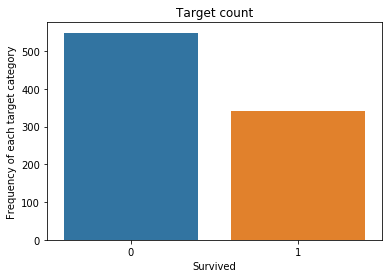

In [9]:
sns.countplot(train_df['Survived'])
plt.title('Target count')
plt.xlabel('Survived')
plt.ylabel('Frequency of each target category')

### if balanced/ imbalance classes

In [10]:
df_survived = train_df[train_df['Survived'] == 1]

In [11]:
df_survived.shape

(342, 12)

## 342 Passangers Survived

In [12]:
df_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Graphical analysis Enitre Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002609291B748>,
      dtype=object)

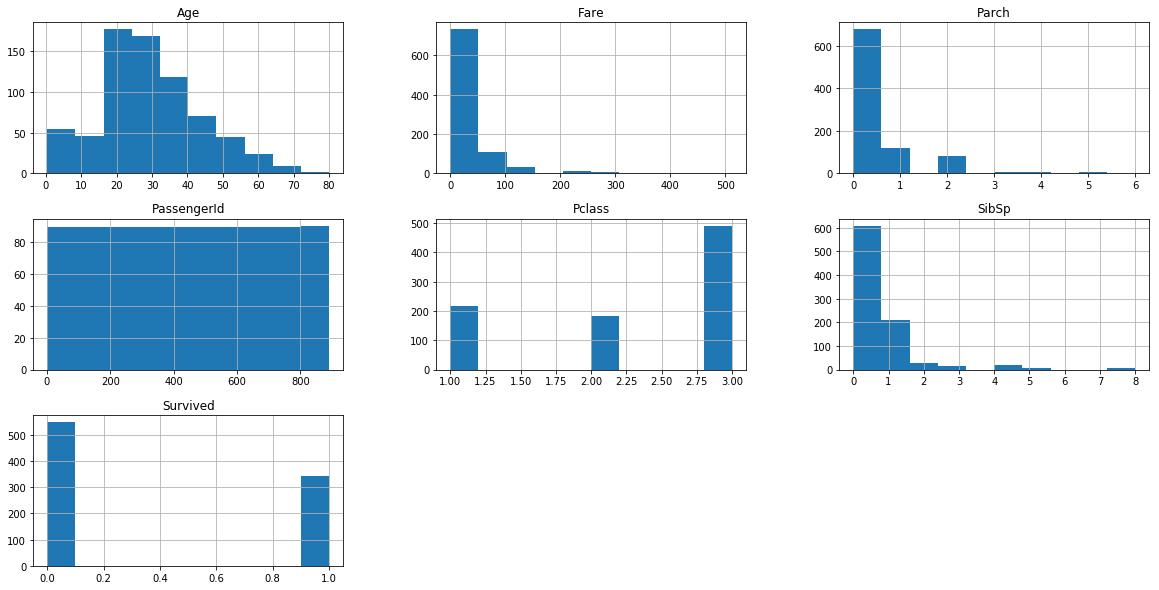

In [13]:
train_df.hist(figsize=(20,10))

## Missing Values handling
 
 ### Dropping/ Filling
 - if more that 70% missing values drop the columns
 - filling (mean, median, mode, random vaules between 2  standard deviation
 
 
 ### Note: Mean is biased by outliers

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing values
### Age column = 177
### Cabin colum = 687

### Let's See in Percentage

In [15]:
# missing values

round(train_df.isnull().sum()/train_df.shape[0]*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

### missing values dropping/ filling
- dropping cabin column bcoz its having more than 70% data missing
- embark and age can be filled by mean

## Filling null values in Age column by mean of Age

In [16]:
train_df['Age'] = train_df.Age.fillna(np.mean(train_df['Age']))

In [17]:
test_df['Age'] = test_df.Age.fillna(np.mean(test_df['Age']))

In [18]:
# train_df.head()

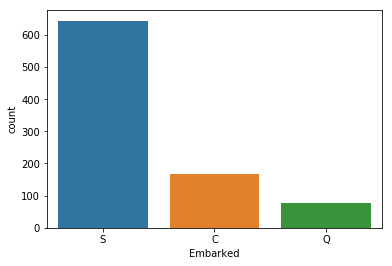

In [19]:
sns.countplot(train_df['Embarked'])

In [20]:
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, 'S')

In [21]:
test_df['Embarked'] = test_df['Embarked'].replace(np.nan, 'S')

# Dropping 'Cabin' clumns due to more missing values

In [22]:
train_df.drop(['Cabin'], axis=1, inplace=True)

In [23]:
test_df.drop(['Cabin'], axis=1, inplace=True)

# Let's cross check if any null values still exists in DataFrame

In [24]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## There is no null values in Data Now

In [25]:
# why normality graph is better ?
# How well sample data represent actual dataset.

# 1. positve skewed -> log, sqrt, 1/3root, 
# 2. if negative knewed -> power (2,3,4,5...)

from scipy.stats import skew


# central limit theorem
# assumption on lenear regression

# Let's see which features are 'Categorical' & 'Numerical' 

In [26]:
numeriacal_feature = train_df.select_dtypes(include=np.number).columns
categorical_feature = train_df.select_dtypes(include=np.number).columns

In [27]:
numeriacal_feature

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [28]:
categorical_feature

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

# Graphical representation of Fare column

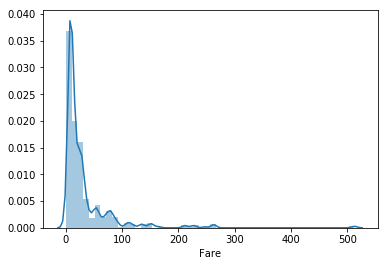

In [29]:
sns.distplot(train_df.Fare)

## If Data is skewed, Taking log can be helpful

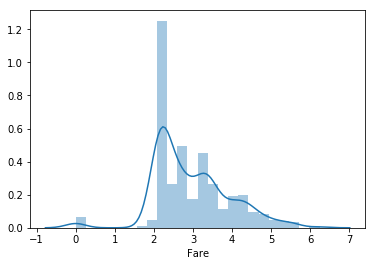

In [30]:
sns.distplot(np.log1p(train_df.Fare)) # log1p add 1 to entire data

## Now Data Looks Normally distributed

In [31]:
train_df.Fare = np.log1p(train_df.Fare)
test_df.Fare = np.log1p(test_df.Fare)

# Let's analysis Age Column

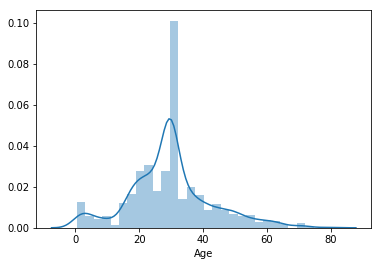

In [32]:
sns.distplot(train_df.Age) 

# age looks balance so not need to treat

In [33]:
skew(train_df[numeriacal_feature], nan_policy='omit')

array([ 0.        ,  0.47771747, -0.62948588,  0.43375629,  3.68912768,
        2.74448674,  0.39426284])

# =============================================================

# Encoding

- drop 'Name', 'Ticket name' is not relevant feature
- Sex - handleit replace male with 1 and female with 0
- Embark

In [34]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [35]:
categorical_feature

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Replacing male by 1 and Female by 0

In [36]:
train_df.Sex = train_df.Sex.map({'male':1,'female':0})

In [37]:
train_df.Sex

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

## Paralally doing for test data also

In [38]:
test_df.Sex = test_df.Sex.map({'male':1,'female':0})

### Embark categories

In [39]:
train_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
pd.get_dummies(train_df.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


# Dropping Name and ticket column
## These are not helping for model accuracy

In [41]:
train_df.drop(['Name','Ticket'], axis=1, inplace=True)

In [42]:
test_df.drop(['Name','Ticket'], axis=1, inplace=True)

In [43]:
train_df_ = pd.get_dummies(train_df)

In [44]:
train_df_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,2.110213,0,0,1
1,2,1,1,0,38.0,1,0,4.280593,1,0,0
2,3,1,3,0,26.0,0,0,2.188856,0,0,1
3,4,1,1,0,35.0,1,0,3.990834,0,0,1
4,5,0,3,1,35.0,0,0,2.202765,0,0,1


In [45]:
test_df_ = pd.get_dummies(test_df)

In [46]:
test_df_.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,2.178064,0,1,0
1,893,3,0,47.0,1,0,2.079442,0,0,1
2,894,2,1,62.0,0,0,2.369075,0,1,0
3,895,3,1,27.0,0,0,2.268252,0,0,1
4,896,3,0,22.0,1,1,2.586824,0,0,1


In [96]:
train_df_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,2.110213,0,0,1
1,2,1,1,0,38.0,1,0,4.280593,1,0,0
2,3,1,3,0,26.0,0,0,2.188856,0,0,1
3,4,1,1,0,35.0,1,0,3.990834,0,0,1
4,5,0,3,1,35.0,0,0,2.202765,0,0,1


# Let's See correlation of among features using heatmap

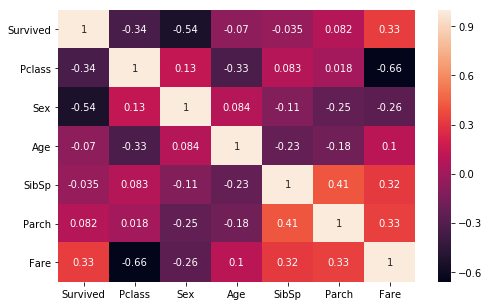

In [47]:
plt.figure(figsize=(8,5))
sns.heatmap(train_df.drop('PassengerId', axis=1).corr(), annot=True)

- what to do if two features are highly correlated ?
- remove one feature

- is it good if any feature is correlated with traget variable ?
 

- what if among features A,B,....Z is correlated with B, b is correlated with E, E is correlated with F,
- F is again correlated with A?
- multicolleanearity
- handling through VIF check, if VIF>5, remove that feature

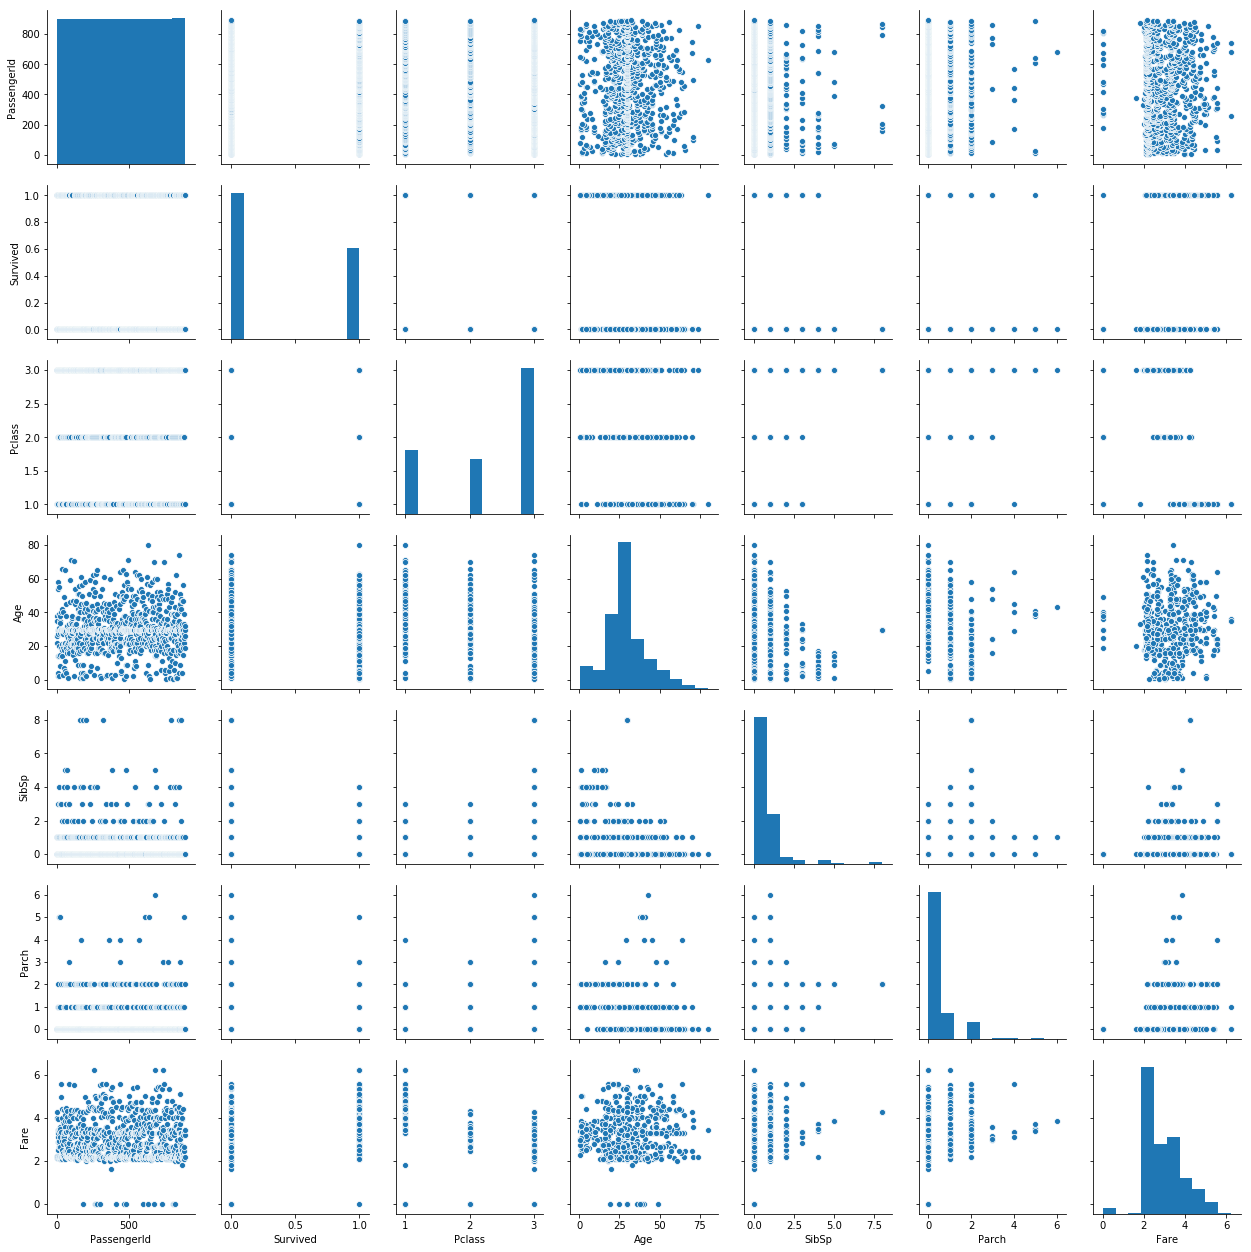

In [48]:
sns.pairplot(train_df[numeriacal_feature])

# ============================================================

# Training Model by Random Forest Algorithm

In [63]:
import time

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [50]:
train_df_.shape

(891, 11)

In [51]:
train_df_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,2.110213,0,0,1
1,2,1,1,0,38.0,1,0,4.280593,1,0,0
2,3,1,3,0,26.0,0,0,2.188856,0,0,1
3,4,1,1,0,35.0,1,0,3.990834,0,0,1
4,5,0,3,1,35.0,0,0,2.202765,0,0,1


In [54]:
y = train_df_['Survived']

In [55]:
x = train_df_[['PassengerId','Pclass','Sex','Age','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 9)
(623,)
(268, 9)
(268,)


In [74]:
RF_model =  RandomForestClassifier(random_state=42)

In [75]:
RF_model.fit(x_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [76]:
predictions_rf = RF_model.predict(x_test)

In [77]:
accuracy_rf = RF_model.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.802


# Accuaracy 80% for training Data

# ==========================================================

# Prediction for Test Data

In [83]:
x_test.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
709,710,3,1,29.699118,1,2.787834,1,0,0
439,440,2,1,31.000000,0,2.442347,0,0,1
840,841,3,1,20.000000,0,2.188856,0,0,1
720,721,2,0,6.000000,1,3.526361,0,0,1
39,40,3,0,14.000000,0,2.504848,1,0,0


In [86]:
test_df_final = test_df_.drop(['SibSp'], axis=1,inplace=True)

In [94]:
test_df_.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,2.178064,0,1,0
1,893,3,0,47.0,0,2.079442,0,0,1
2,894,2,1,62.0,0,2.369075,0,1,0
3,895,3,1,27.0,0,2.268252,0,0,1
4,896,3,0,22.0,1,2.586824,0,0,1


In [99]:
test_df_.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [100]:
test_df_['Fare'] = test_df_.Fare.fillna(np.mean(test_df['Fare']))

In [101]:
test_df_.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [102]:
predictions_rf1 = RF_model.predict(test_df_)

In [103]:
predictions_rf1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
test_df_.insert(2, "predicted_survived", predictions_rf1)

# Exporting CSV file with "Survived" column added

In [108]:
test_df_.to_csv('Predicted_survived.csv')